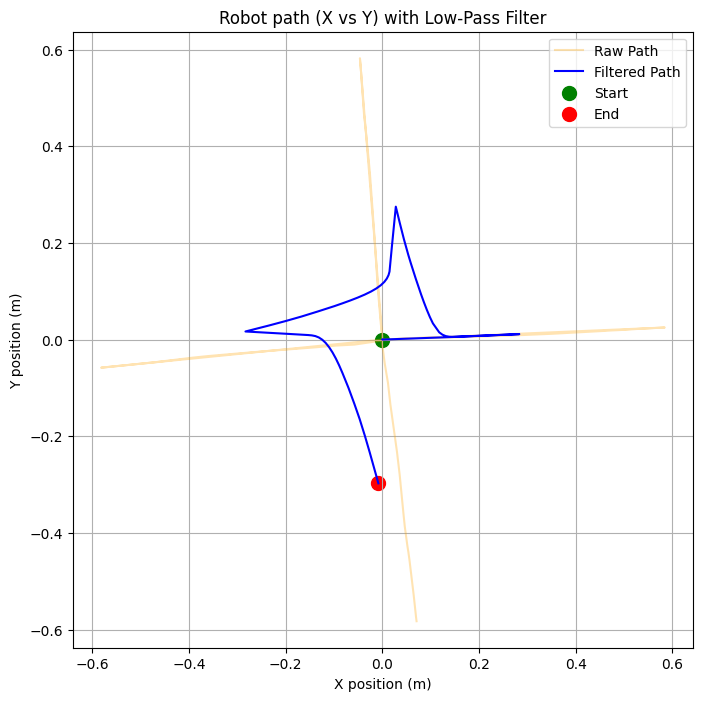

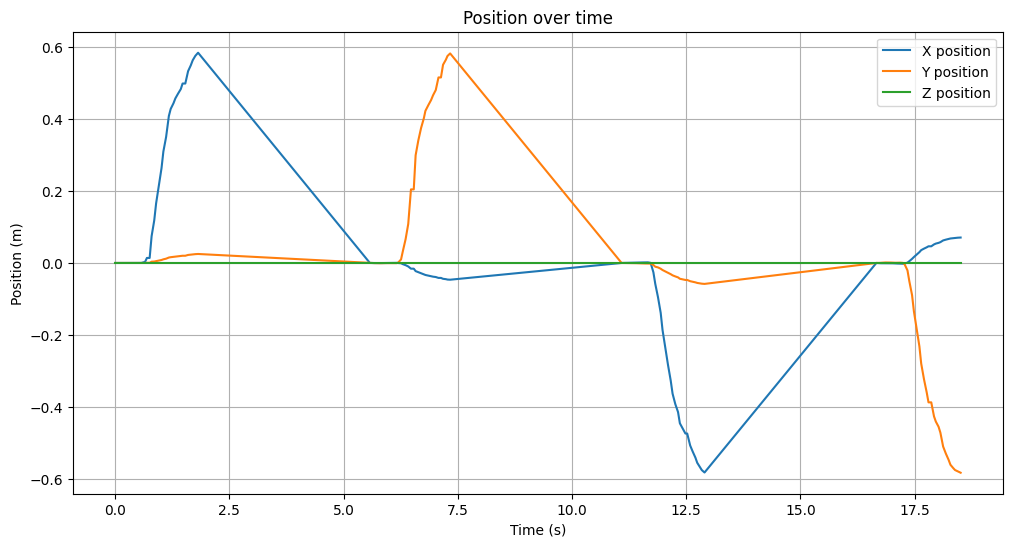

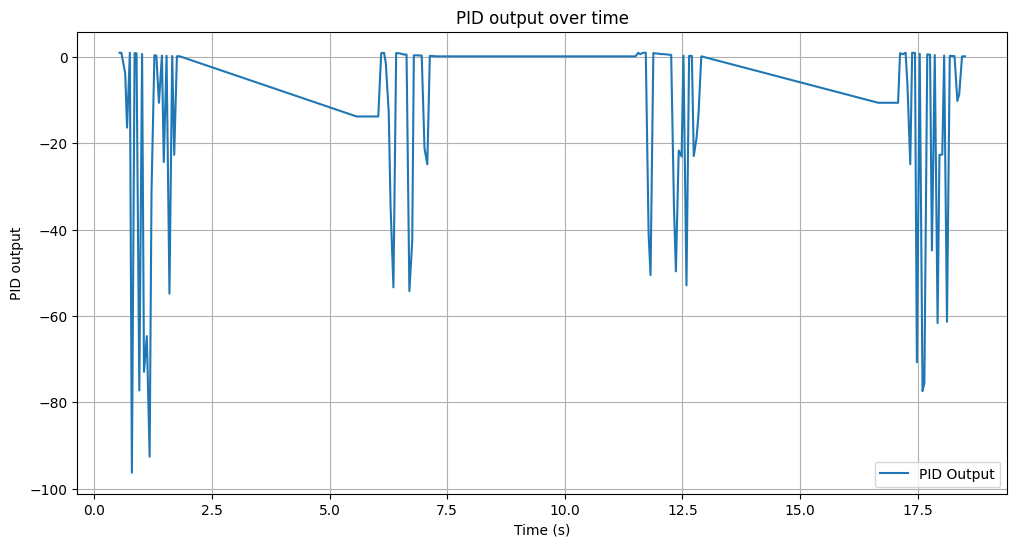

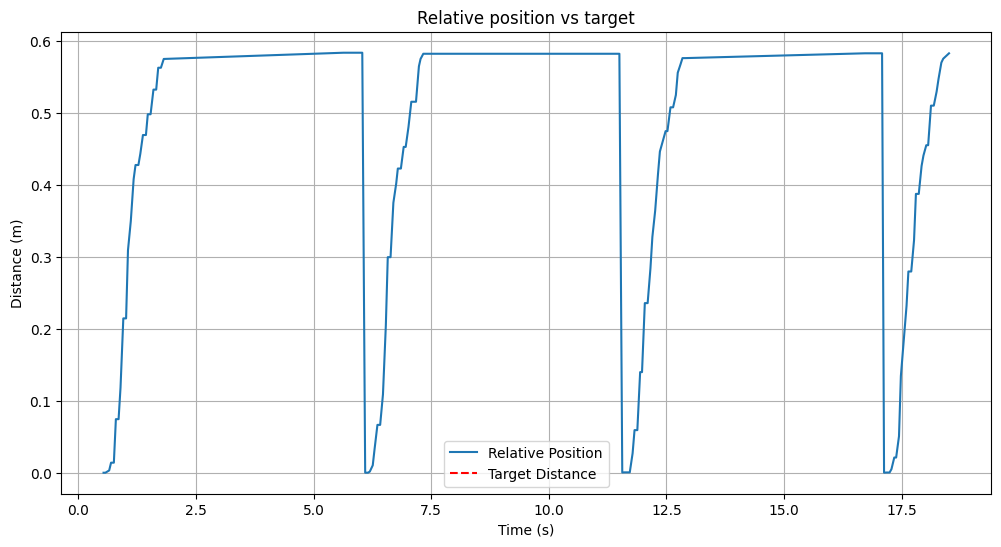

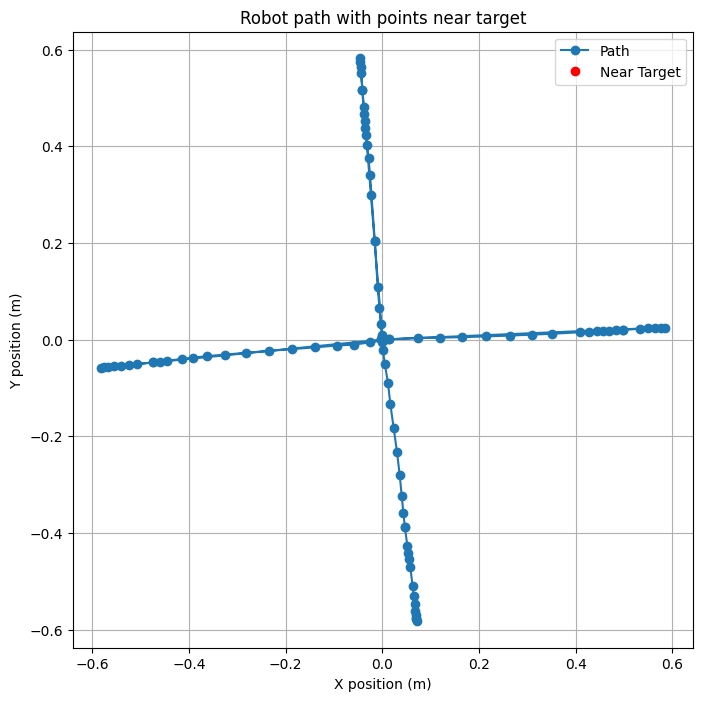

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === ฟังก์ชัน Low-Pass Filter (Exponential Moving Average) ===
def low_pass_filter(data, alpha=0.05):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# === โหลดข้อมูลจากไฟล์ ===
df = pd.read_csv("robot_log_15_55_34_P1-6_I0-3_D3.csv")

# แปลง timestamp เป็นวินาทีตั้งแต่เริ่ม
start_time = df['time'].iloc[0]
df['time_sec'] = df['time'] - start_time

# เติม NaN ด้วย 0 เพื่อให้ filter ใช้งานได้
x_raw = df['x'].fillna(0).values
y_raw = df['y'].fillna(0).values

# กรองสัญญาณเพื่อลด noise
x_filtered = low_pass_filter(x_raw, alpha=0.05)
y_filtered = low_pass_filter(y_raw, alpha=0.05)

# ----------------------------
# Plot 1: เส้นทางหุ่นแบบ Raw และ Filtered
# ----------------------------
plt.figure(figsize=(8, 8))
plt.plot(x_raw, y_raw, alpha=0.3, label='Raw Path', color='orange')
plt.plot(x_filtered, y_filtered, label="Filtered Path", color='blue')
plt.scatter(x_filtered[0], y_filtered[0], color='green', s=100, label='Start')
plt.scatter(x_filtered[-1], y_filtered[-1], color='red', s=100, label='End')
plt.title('Robot path (X vs Y) with Low-Pass Filter')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# ----------------------------
# Plot 2: ตำแหน่ง x, y, z ตามเวลา
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['time_sec'], df['x'], label='X position')
plt.plot(df['time_sec'], df['y'], label='Y position')
plt.plot(df['time_sec'], df['z'], label='Z position')
plt.title('Position over time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 3: PID output ตามเวลา
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['time_sec'], df['pid_output'], label='PID Output')
plt.title('PID output over time')
plt.xlabel('Time (s)')
plt.ylabel('PID output')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# Plot 4: Relative position vs Target distance
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['time_sec'], df['relative_position'], label='Relative Position')
plt.axhline(y=df['target_distance'].iloc[0], color='r', linestyle='--', label='Target Distance')
plt.title('Relative position vs target')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 5: จุดที่เข้าใกล้ Target
# ----------------------------
target = df['target_distance'].iloc[0]
close_to_target = df[(df['relative_position'] >= target - 0.02) &
                     (df['relative_position'] <= target + 0.02)]

plt.figure(figsize=(8, 8))
plt.plot(df['x'], df['y'], 'o-', label='Path')
plt.plot(close_to_target['x'], close_to_target['y'], 'ro', label='Near Target')
plt.title('Robot path with points near target')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
